In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
raw_data  = pd. read_csv('KaggleV2-May-2016.csv', parse_dates=['ScheduledDay','AppointmentDay'])
raw_data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [39]:
#Take the number of No-show cases by using a pandas crosstab
# Creat a new column called No_show_portion to show the portion of No-show

age_ns = pd.crosstab(raw_data['Age'], raw_data['No-show'])
age_ns['No_show_portion'] = age_ns['Yes'] / (age_ns['Yes'] + age_ns['No'])

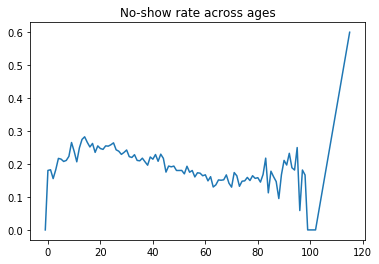

In [68]:
#Plot the No-show rate across ages

plt.plot(age_ns.index,age_ns['No_show_portion'])
plt.title('No-show rate across ages')
plt.show()

***The rate of missing appointments goes up from age 0 to 18 and then keep going down from age 18 to 60. No partten is found after age 80***

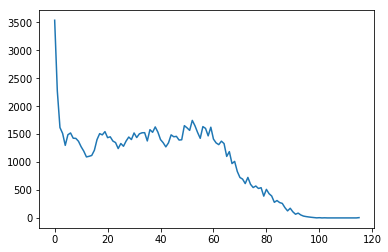

In [26]:
#plot the numbers of people in each age to see the component of appointment by different age

x = list(count_age.keys())
y = list(count_age.values())

plt.plot(x,y)
plt.show()

*** This figure shows  that infanes have a very high appointment volumn while other ages have no obvious difference between one another ***

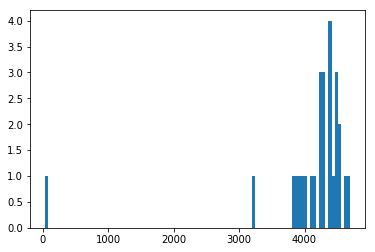

In [28]:
x = raw_data['AppointmentDay'].value_counts()
plt.hist(x,bins=100)
plt.show()

*** This figure shows that most of the days the appointment volumn is above 3000 expect for one outlier. We found that that day is a Saturday ***

In [56]:
#make a new column that shows whether a patient has pre_existing conditions

raw_data['pre_exi_con']= raw_data['Hipertension'] + raw_data['Diabetes'] + raw_data['Alcoholism'] + raw_data['Handcap']

In [37]:
#count numbers of patient with and without pre existing conditions seperately

no_pec = raw_data['pre_exi_con'].value_counts()
count_no_pec = no_pec[0]
count_pec = no_pec[1]
print (no_pec)

0    84115
1    18014
2     7710
3      624
4       63
5        1
Name: pre_exi_con, dtype: int64


In [31]:
#count numbers of people of No-show in each group
no_pec_no_show  = np.count_nonzero(np.logical_and(raw_data['pre_exi_con']== 0 ,raw_data['No-show']== 'Yes'))
pec_no_show = np.count_nonzero(np.logical_and(raw_data['pre_exi_con'] !=0 ,raw_data['No-show']== 'Yes'))

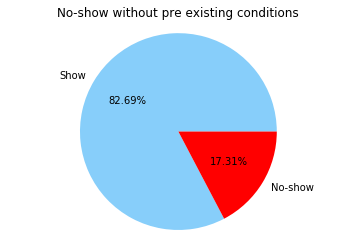

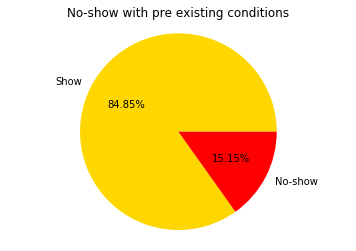

In [32]:
#use pie chart to show the portion of No-show case within different group (group with and without pre existing conditions)

plt.pie([count_no_pec,no_pec_no_show],labels = ['Show','No-show'],colors=['lightskyblue','red'],autopct='%1.2f%%')
plt.axis('equal')
plt.title('No-show without pre existing conditions')
plt.show()

plt.pie([count_pec,pec_no_show],labels = ['Show','No-show'],colors=['gold','red'],autopct='%1.2f%%')
plt.title('No-show with pre existing conditions')
plt.axis('equal')
plt.show()

#now we got two pie chart showing the portion of No-show case under two different conditions,

*** There is only a slight difference between No-show rate of patient with pre existing conditions and No-show rate of patient without pre existing conditions ***